# 使用前，需要先导入需要的头文件

In [1]:
#include <iostream>

/*a workaround to solve cling issue*/
#include "../inc/macos_cling_workaround.hpp"
/*set libtorch path, load libs*/
#include "../inc/load_libtorch.hpp"
/*import custom defined macros*/
#include "../inc/custom_def.hpp"
/*import matplotlibcpp*/
#include "../inc/load_matplotlibcpp.hpp"
/*import opencv*/
#include "../inc/load_opencv.hpp"

/*import libtorch header file*/
#include <torch/torch.h>
#include <opencv2/opencv.hpp>
#include <cmath>

// Use (void) to silent unused warnings.
#define assertm(exp, msg) assert(((void)msg, exp))

In [2]:
#define VAR_NAME(Variable) (#Variable)

void print_tensor_size(std::string name, torch::Tensor t)
{
    int dims = t.dim();
    std::cout << name << " dims is (";
    for (int i = 0; i < dims; i++) {
        std::cout << t.size(i);
        if (i < (dims - 1)) std::cout << " x ";
    }
    std::cout << ")" << std::endl;
}

# 数值稳定性和模型初始化

### 梯度消失

In [3]:
torch::Tensor x = torch::arange(-8.0, 8.0, 0.1, torch::requires_grad(true));
torch::Tensor y = torch::sigmoid(x);
y.backward(torch::ones_like(x));


std::vector<float> a(x.data_ptr<float>(), x.data_ptr<float>() + x.numel());
std::vector<float> b1(y.data_ptr<float>(), y.data_ptr<float>() + y.numel());
std::vector<float> b2(x.grad().data_ptr<float>(), x.grad().data_ptr<float>() + x.grad().numel());

In [4]:
plt::plot(a, b1, {{"color","blue"},{"label", "sigmoid"}});
plt::plot(a, b2, {{"color","red"},{"label", "gradient"}});

plt::title("sigmoid gradient(r:sigmoid  b:gradient)");
plt::legend();
plt::save("./sigmoid_gradient.png"); 
plt::show();

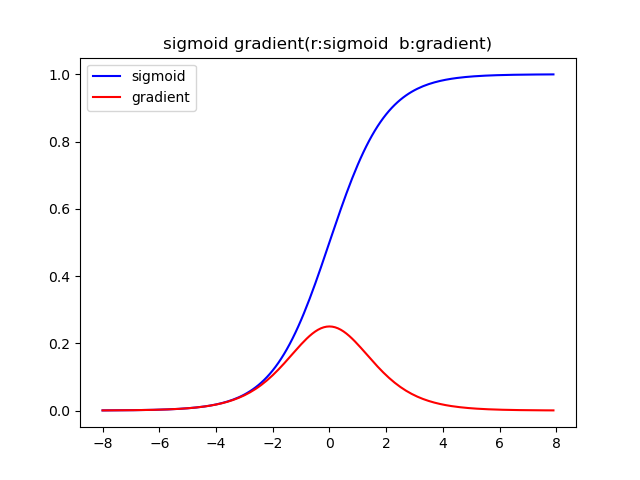

In [5]:
auto img1 = im::image("./sigmoid_gradient.png");
img1

### 梯度爆炸

In [6]:
torch::Tensor M = torch::normal(0, 1, {4, 4});
printT(M);
for (int i = 0; i < 100; i++) {
    M = M.mm(torch::normal(0, 1, {4, 4}));
}
printT(M);


M = 
 0.9385 -1.5158 -0.3394  0.7158
 0.8733 -0.1764 -0.4930  0.5084
 2.1272 -0.9782  0.4421 -0.2719
-0.1538  0.2205 -1.6513 -1.0119
[ CPUFloatType{4,4} ]
<<--->>

M = 
 6.4324e+25 -9.8324e+25 -2.1263e+25 -6.1326e+24
 2.7618e+25 -4.2216e+25 -9.1296e+24 -2.6330e+24
 1.3638e+26 -2.0846e+26 -4.5082e+25 -1.3002e+25
-1.7756e+25  2.7141e+25  5.8695e+24  1.6928e+24
[ CPUFloatType{4,4} ]
<<--->>

